<a href="https://colab.research.google.com/github/pedrocrf/Analise-de-dados-de-vendas/blob/main/%5BDaron_Analytics%5D_Case_Dados_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importar Bibliotecas, Carregar Dados e Configurar Bibliotecas de Gráficos



In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
file_path = '/content/dados_vendas.csv'  # Atualize o caminho para o seu arquivo
dados_vendas = pd.read_csv(file_path)

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Mostrar as primeiras linhas do dataframe para entender a estrutura dos dados
dados_vendas.head()

,Data,Produto,Categoria,Preço,Quantidade,Receita,Região
0,2023-10-19,Produto D,Categoria 1,489.40,36.0,17618.40,Região Leste
1,2022-01-04,Produto E,Categoria 2,43.85,51.0,2236.35,Região Leste
2,2023-09-11,Produto A,Categoria 1,156.26,82.0,12813.32,Região Leste
3,2022-08-04,Produto C,Categoria 1,58.69,50.0,2934.50,Região Leste
4,2022-01-06,Produto E,Categoria 2,430.99,55.0,23704.45,Região Oeste


<Figure size 1200x600 with 0 Axes>

#### Verificar e Limpar a Coluna de Data

In [ ]:
# Verificar valores únicos na coluna 'Data'
dados_vendas['Data'].unique()

# Remover espaços em branco e caracteres indesejados
dados_vendas['Data'] = dados_vendas['Data'].str.strip()

# Verificar novamente valores únicos na coluna 'Data'
dados_vendas['Data'].unique()

array(['2023-10-19', '2022-01-04', '2023-09-11', '2022-08-04',
       '2022-01-06', '2023-03-24', '2022-06-07', '2023-08-26',
       '2022-09-22', '2023-02-12', '2022-01-13', '2023-08-27',
       '2023-05-10', '2023-08-31', '2022-12-23', '2022-10-02',
       '2022-10-30', '2022-09-09', '2023-08-06', '2022-04-04',
       '2023-07-24', '2022-01-31', '2022-10-28', '2023-05-11',
       '2022-04-14', '2022-11-06', '2022-11-25', '2022-04-08',
       '2023-04-15', '2023-02-15', '2022-02-21', '2023-07-21',
       '2022-01-27', '2022-04-26', '2022-12-31', '2023-11-16',
       '2023-03-03', '2023-07-08', '2022-10-31', '2023-03-18',
       '2023-06-23', '2022-06-09', '2023-11-09', '2022-12-08',
       '2023-05-15', '2023-11-24', '2022-10-10', '2022-10-23',
       '2022-06-12', '2023-04-06', '2023-09-22', '2023-01-20',
       '2022-08-22', '2022-06-04', '2022-10-05', '2023-05-20',
       '2023-09-15', '2022-05-31', '2022-06-30', '2022-10-18',
       '2023-06-03', '2022-07-27', '2022-05-08', '2022-

#### Converter a Coluna de Data e Analisar Tendências de Vendas ao Longo do Tempo

AnoMes      object
Receita    float64
dtype: object


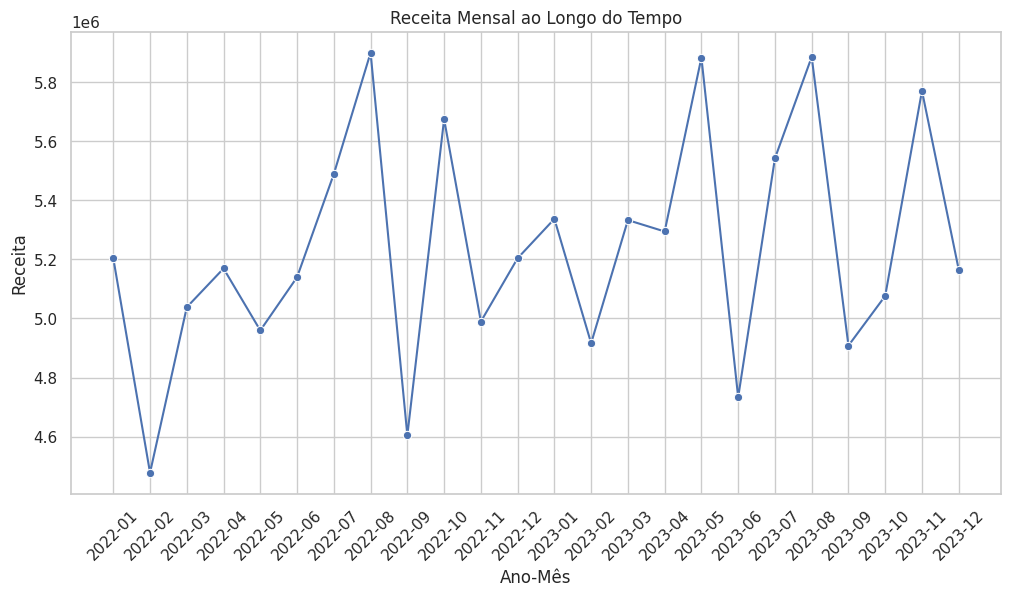

In [ ]:
# Converter a coluna de Data para o tipo datetime, ignorando erros
dados_vendas['Data'] = pd.to_datetime(dados_vendas['Data'], errors='coerce')

# Remover linhas com datas inválidas (NaT)
dados_vendas = dados_vendas.dropna(subset=['Data'])

# Agrupar por ano e mês, e calcular a receita total para cada mês
dados_vendas['AnoMes'] = dados_vendas['Data'].dt.to_period('M')
receita_mensal = dados_vendas.groupby('AnoMes')['Receita'].sum().reset_index()

# Converter AnoMes para string para garantir que seja plotável
receita_mensal['AnoMes'] = receita_mensal['AnoMes'].astype(str)

# Verificar o tipo de dados de cada coluna
print(receita_mensal.dtypes)

# Plotar a receita mensal
plt.figure(figsize=(12, 6))
sns.lineplot(data=receita_mensal, x='AnoMes', y='Receita', marker='o')
plt.title('Receita Mensal ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.show()

#### Análise Sazonal

<ipython-input-62-163a9efa24bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=receita_mensal_sazonal, x='Mes', y='Receita', palette='coolwarm')


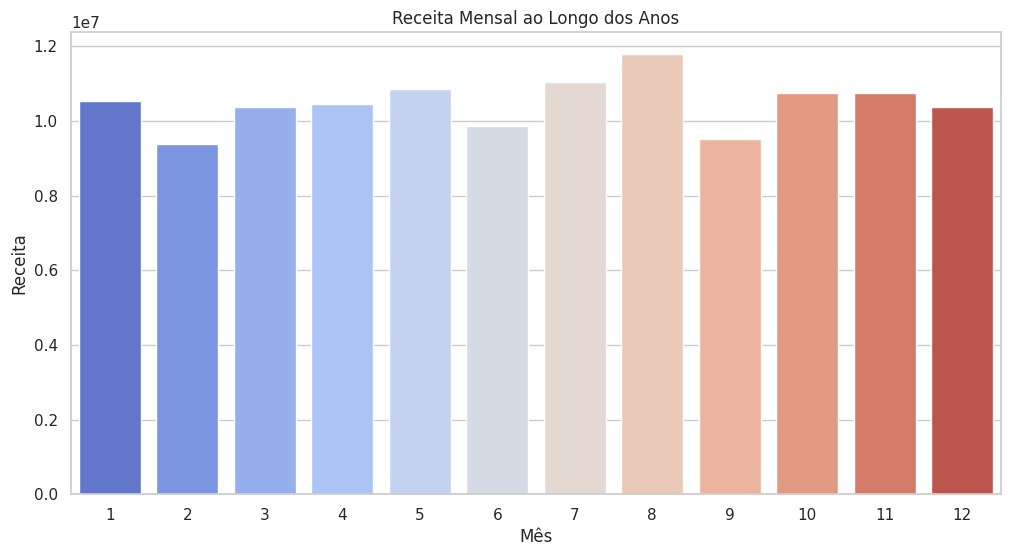

In [ ]:
# Análise Sazonal
dados_vendas['Mes'] = dados_vendas['Data'].dt.month
receita_mensal_sazonal = dados_vendas.groupby('Mes')['Receita'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=receita_mensal_sazonal, x='Mes', y='Receita', palette='coolwarm')
plt.title('Receita Mensal ao Longo dos Anos')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.show()

#### Receita e Quantidade Vendida por Produto e Categoria

<ipython-input-63-a6e1479e7e92>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=produto_analise, x='Produto', y='Receita', palette='viridis')


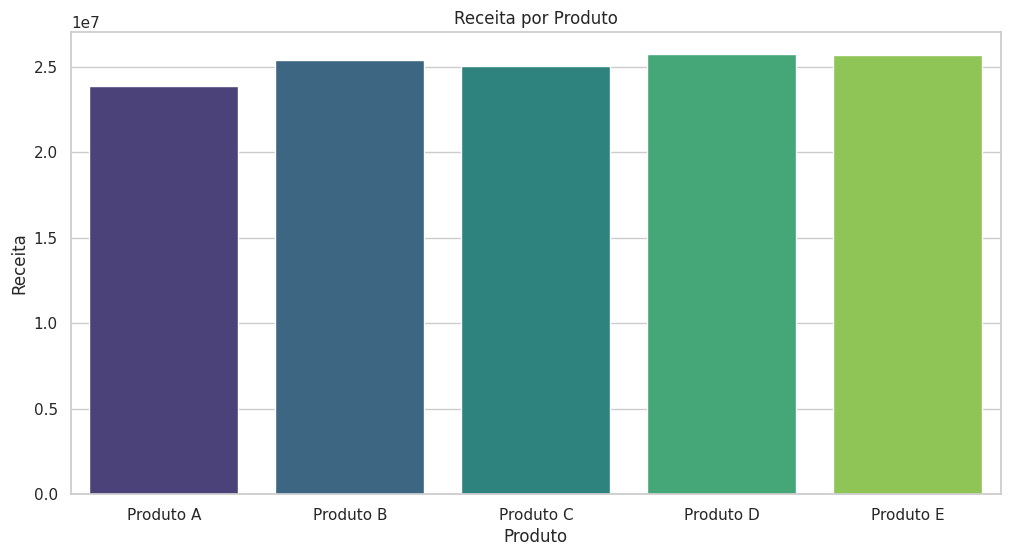

<ipython-input-63-a6e1479e7e92>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=produto_analise, x='Produto', y='Quantidade', palette='viridis')


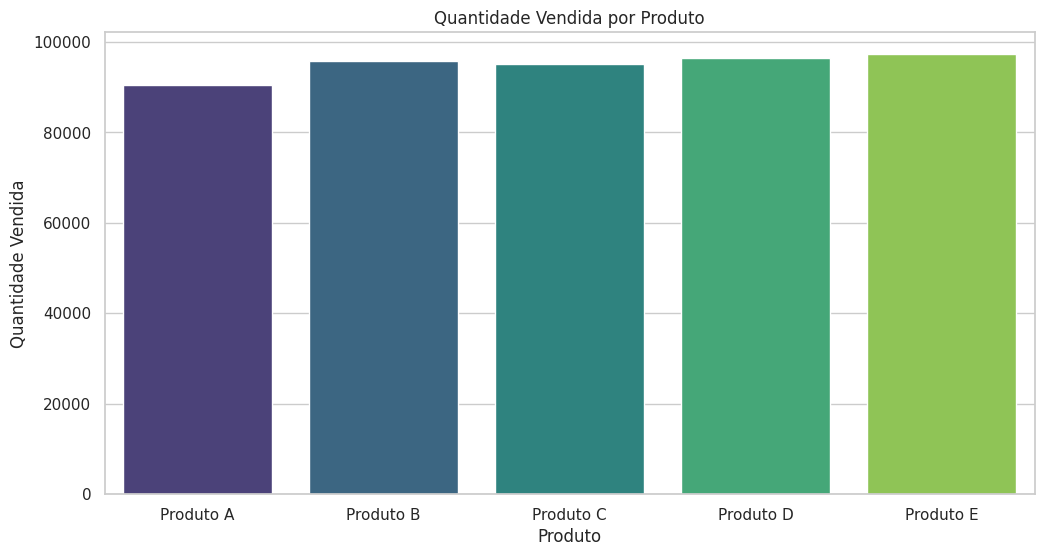

<ipython-input-63-a6e1479e7e92>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categoria_analise, x='Categoria', y='Receita', palette='viridis')


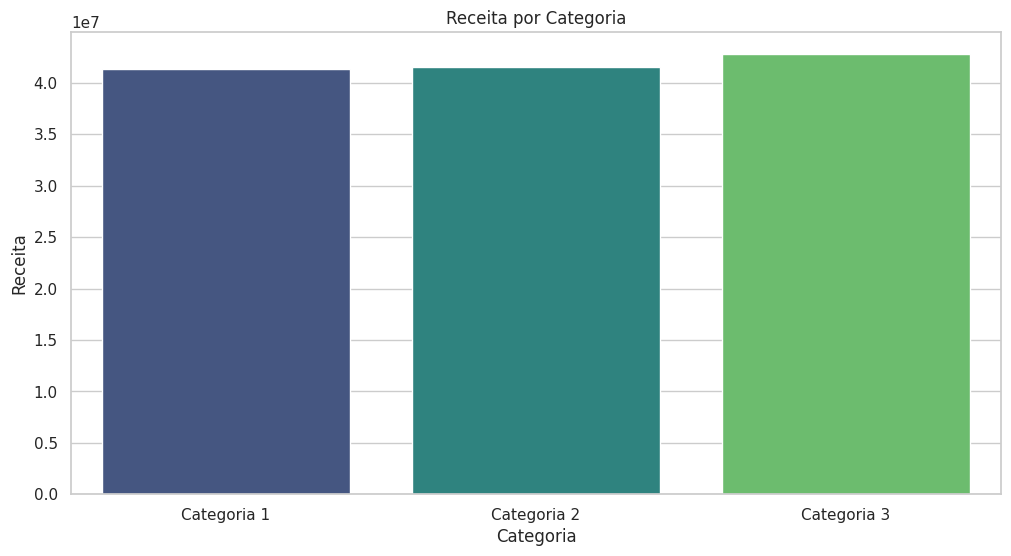

<ipython-input-63-a6e1479e7e92>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categoria_analise, x='Categoria', y='Quantidade', palette='viridis')


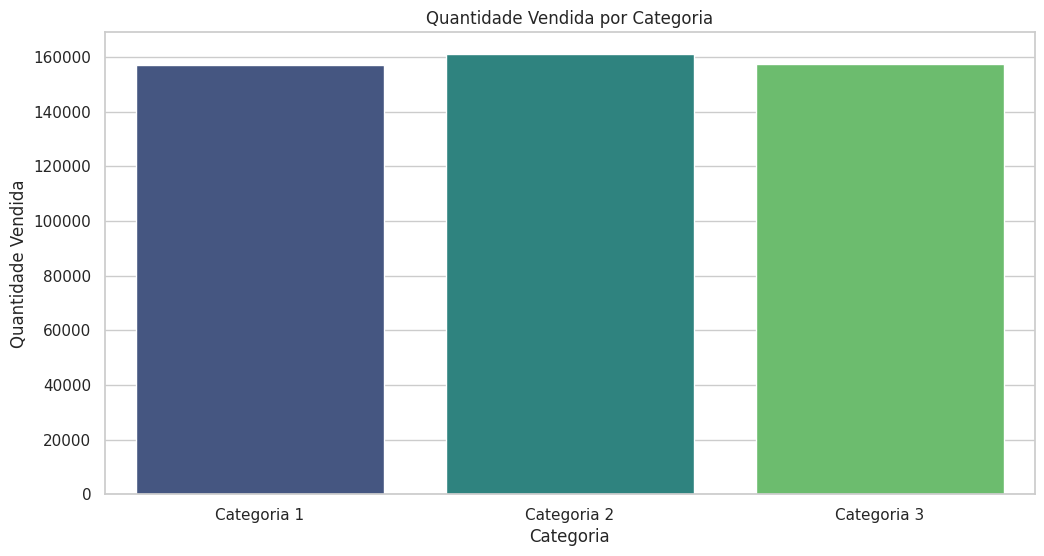

In [ ]:
# Agrupar por produto e calcular a receita total e quantidade vendida
produto_analise = dados_vendas.groupby('Produto').agg({'Receita': 'sum', 'Quantidade': 'sum'}).reset_index()

# Agrupar por categoria e calcular a receita total e quantidade vendida
categoria_analise = dados_vendas.groupby('Categoria').agg({'Receita': 'sum', 'Quantidade': 'sum'}).reset_index()

# Plotar a receita por produto
plt.figure(figsize=(12, 6))
sns.barplot(data=produto_analise, x='Produto', y='Receita', palette='viridis')
plt.title('Receita por Produto')
plt.xlabel('Produto')
plt.ylabel('Receita')
plt.show()

# Plotar a quantidade vendida por produto
plt.figure(figsize=(12, 6))
sns.barplot(data=produto_analise, x='Produto', y='Quantidade', palette='viridis')
plt.title('Quantidade Vendida por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

# Plotar a receita por categoria
plt.figure(figsize=(12, 6))
sns.barplot(data=categoria_analise, x='Categoria', y='Receita', palette='viridis')
plt.title('Receita por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Receita')
plt.show()

# Plotar a quantidade vendida por categoria
plt.figure(figsize=(12, 6))
sns.barplot(data=categoria_analise, x='Categoria', y='Quantidade', palette='viridis')
plt.title('Quantidade Vendida por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.show()

#### Estatísticas Descritivas dos Preços e Quantidades Vendidas

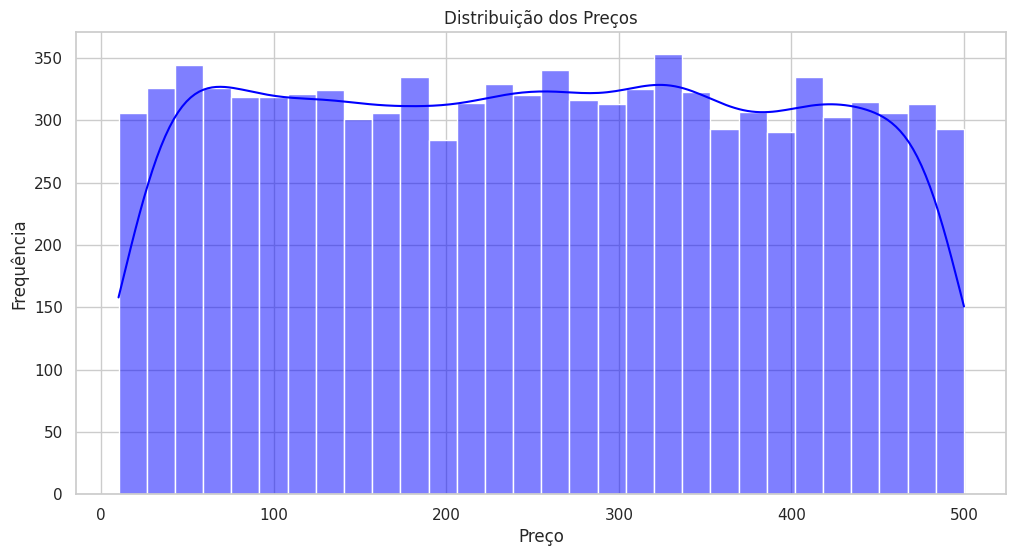

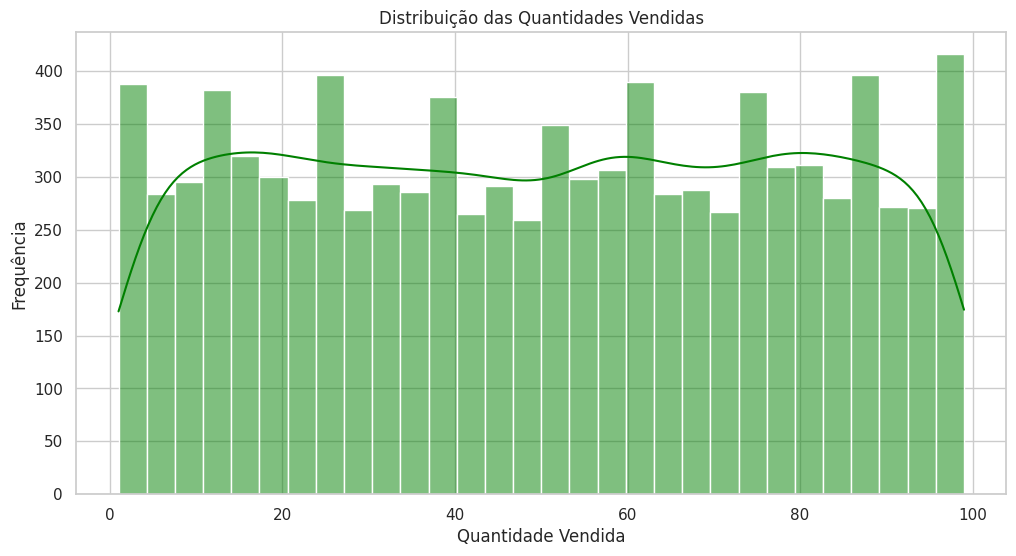

In [ ]:
# Estatísticas descritivas para os preços
estatisticas_precos = dados_vendas['Preço'].describe()

# Estatísticas descritivas para as quantidades vendidas
estatisticas_quantidade = dados_vendas['Quantidade'].describe()

# Plotar a distribuição dos preços
plt.figure(figsize=(12, 6))
sns.histplot(dados_vendas['Preço'], kde=True, bins=30, color='blue')
plt.title('Distribuição dos Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Plotar a distribuição das quantidades vendidas
plt.figure(figsize=(12, 6))
sns.histplot(dados_vendas['Quantidade'], kde=True, bins=30, color='green')
plt.title('Distribuição das Quantidades Vendidas')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Frequência')
plt.show()

#### Analisar Receita por Região

<ipython-input-65-b583b2708816>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regiao_analise, x='Região', y='Receita', palette='magma')


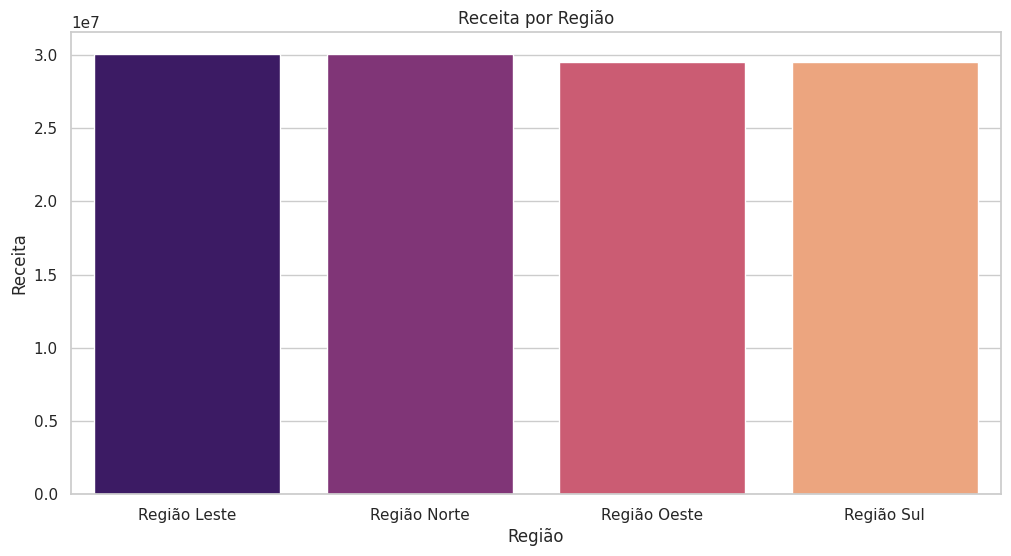

In [ ]:
# Agrupar por região e calcular a receita total
regiao_analise = dados_vendas.groupby('Região')['Receita'].sum().reset_index()

# Plotar a receita por região
plt.figure(figsize=(12, 6))
sns.barplot(data=regiao_analise, x='Região', y='Receita', palette='magma')
plt.title('Receita por Região')
plt.xlabel('Região')
plt.ylabel('Receita')
plt.show()

#### Análise de Produtos Mais Vendidos

<ipython-input-66-7d9dfb85cded>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_produtos_receita, x='Produto', y='Receita', palette='viridis')


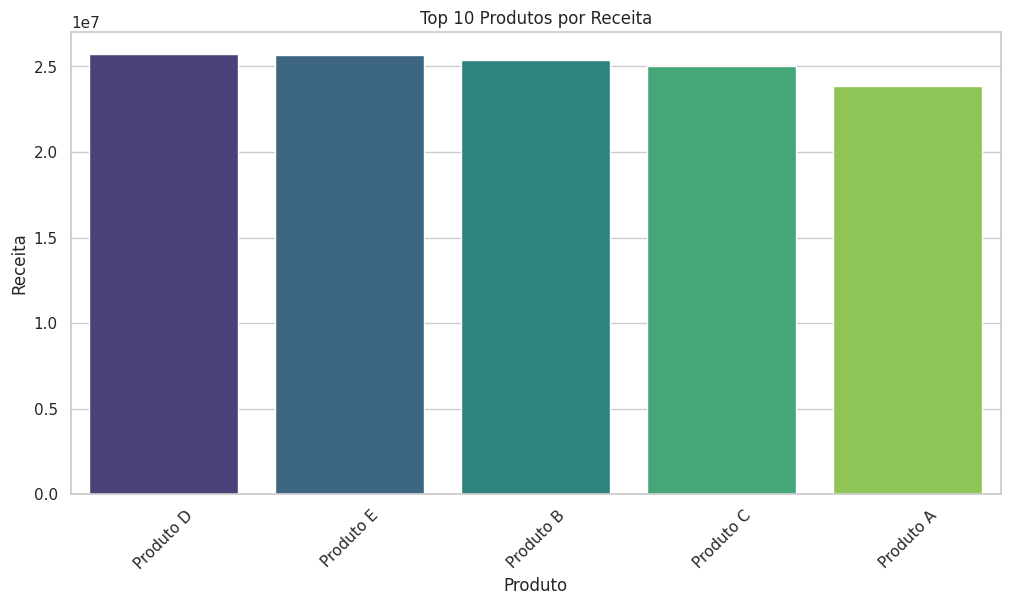

<ipython-input-66-7d9dfb85cded>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_produtos_quantidade, x='Produto', y='Quantidade', palette='viridis')


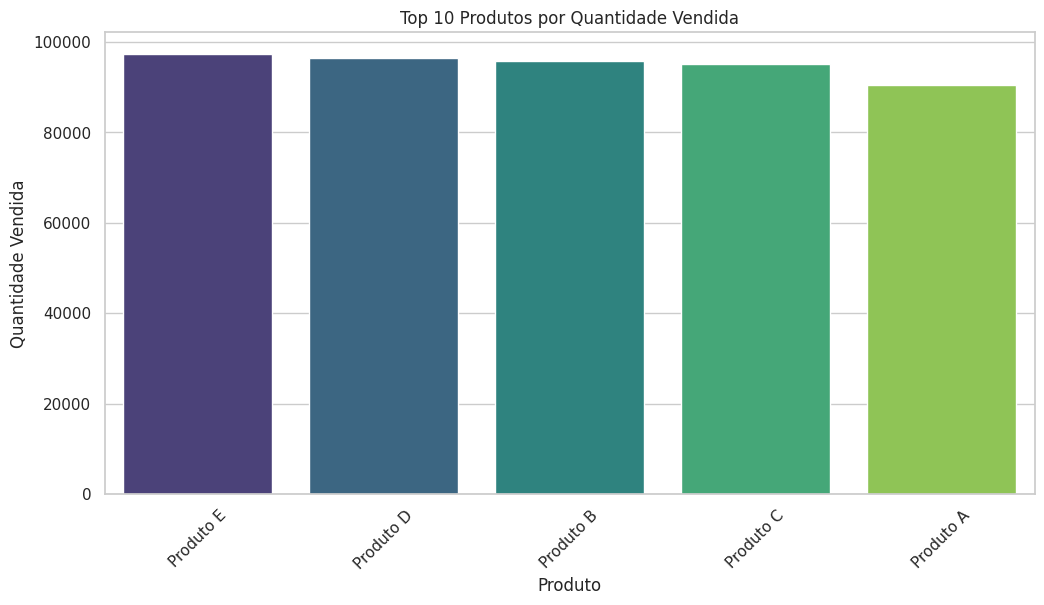

In [ ]:
# Análise de Produtos Mais Vendidos
top_produtos_receita = dados_vendas.groupby('Produto')['Receita'].sum().reset_index().sort_values(by='Receita', ascending=False).head(10)
top_produtos_quantidade = dados_vendas.groupby('Produto')['Quantidade'].sum().reset_index().sort_values(by='Quantidade', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_produtos_receita, x='Produto', y='Receita', palette='viridis')
plt.title('Top 10 Produtos por Receita')
plt.xlabel('Produto')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_produtos_quantidade, x='Produto', y='Quantidade', palette='viridis')
plt.title('Top 10 Produtos por Quantidade Vendida')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

####Análise de Correlação

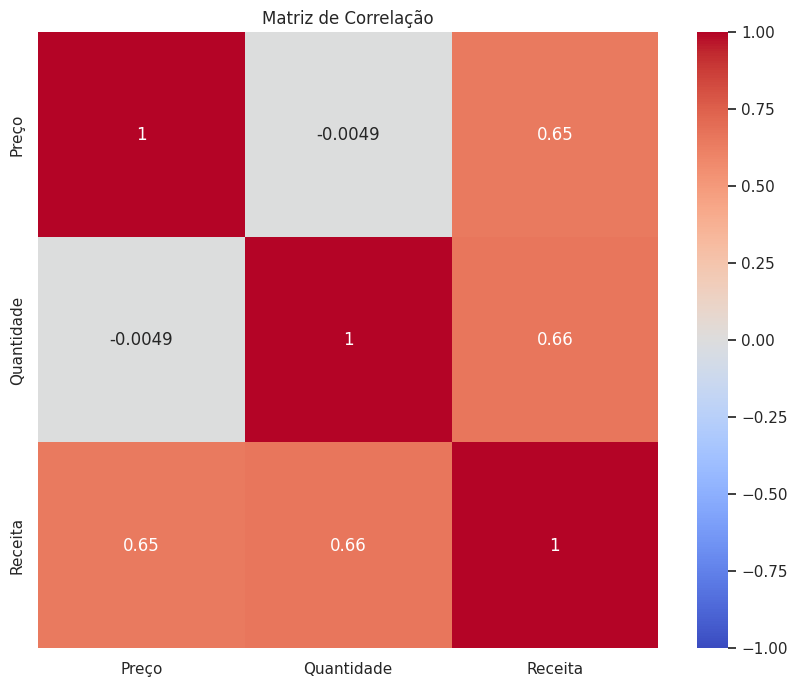

In [ ]:
# Análise de Correlação
correlacao = dados_vendas[['Preço', 'Quantidade', 'Receita']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

### Inferir Regiões Ausentes com Base na Frequência dos Produtos

#### Verificar a Frequência de Produtos por Região

In [ ]:
# Filtrar dados com região preenchida
dados_com_regiao = dados_vendas[dados_vendas['Região'].notna()]

# Contar a frequência de cada produto por região
frequencia_produto_regiao = dados_com_regiao.groupby(['Produto', 'Região']).size().unstack(fill_value=0)

# Mostrar a frequência de produtos por região
frequencia_produto_regiao

Região,Região Leste,Região Norte,Região Oeste,Região Sul
Produto,,,,
Produto A,458,446,469,471
Produto B,469,487,458,473
Produto C,479,450,491,468
Produto D,485,499,469,481
Produto E,479,489,491,488


#### Inferir Regiões Ausentes com Base na Frequência dos Produtos

<ipython-input-69-e5cecd1ce710>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regiao_analise_inferida, x='Região', y='Receita', palette='magma')


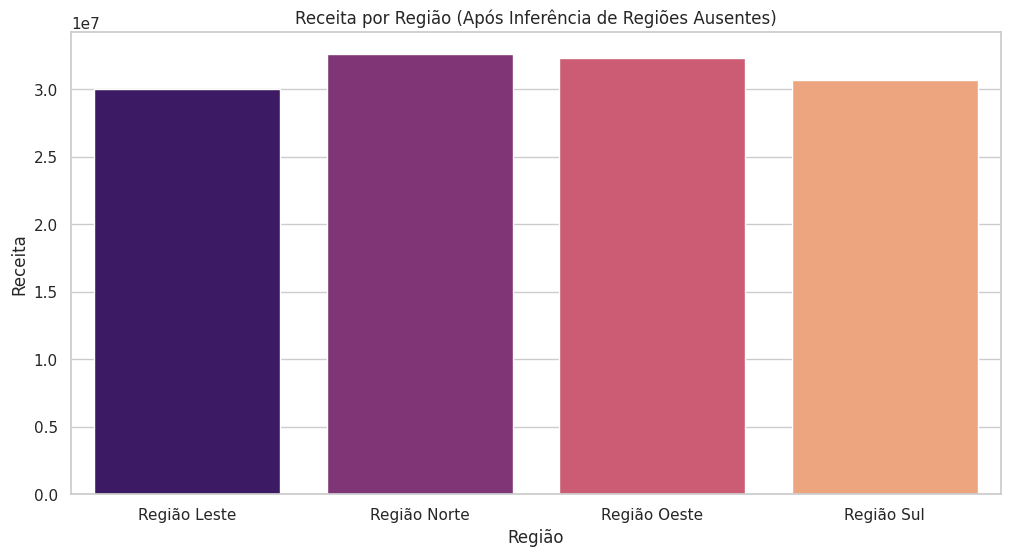

In [ ]:
# Criar um dicionário para mapear produtos para suas regiões mais frequentes
produto_para_regiao_mais_frequente = frequencia_produto_regiao.idxmax(axis=1).to_dict()

# Preencher as regiões ausentes com base no produto mais frequente
dados_vendas['Região'] = dados_vendas.apply(
    lambda row: produto_para_regiao_mais_frequente[row['Produto']] if pd.isna(row['Região']) else row['Região'],
    axis=1
)

# Recalcular a receita por região após preencher os valores nulos com inferência
regiao_analise_inferida = dados_vendas.groupby('Região')['Receita'].sum().reset_index()

# Plotar a receita por região após inferência
plt.figure(figsize=(12, 6))
sns.barplot(data=regiao_analise_inferida, x='Região', y='Receita', palette='magma')
plt.title('Receita por Região (Após Inferência de Regiões Ausentes)')
plt.xlabel('Região')
plt.ylabel('Receita')
plt.show()

#### Resumo e Recomendações

In [ ]:
# Resumo das principais descobertas
print("### Tendências de Vendas ao Longo do Tempo")
print(receita_mensal)

print("\n### Receita e Quantidade Vendida por Produto")
print(produto_analise)

print("\n### Receita e Quantidade Vendida por Categoria")
print(categoria_analise)

print("\n### Estatísticas Descritivas dos Preços")
print(estatisticas_precos)

print("\n### Estatísticas Descritivas das Quantidades Vendidas")
print(estatisticas_quantidade)

print("\n### Receita por Região (Após Inferência de Regiões Ausentes)")
print(regiao_analise_inferida)

# Recomendações (resuma suas recomendações aqui)

### Tendências de Vendas ao Longo do Tempo
     AnoMes     Receita
0   2022-01  5204470.72
1   2022-02  4477674.74
2   2022-03  5038198.67
3   2022-04  5169328.95
4   2022-05  4959532.81
5   2022-06  5139871.80
6   2022-07  5489324.95
7   2022-08  5899949.63
8   2022-09  4604233.74
9   2022-10  5675129.95
10  2022-11  4989571.34
11  2022-12  5204033.17
12  2023-01  5337310.22
13  2023-02  4916381.25
14  2023-03  5333194.07
15  2023-04  5294652.40
16  2023-05  5883520.41
17  2023-06  4733231.86
18  2023-07  5542428.35
19  2023-08  5885625.91
20  2023-09  4908201.53
21  2023-10  5076482.37
22  2023-11  5770848.83
23  2023-12  5165517.13

### Receita e Quantidade Vendida por Produto
     Produto      Receita  Quantidade
0  Produto A  23851095.28     90486.0
1  Produto B  25401339.21     95716.0
2  Produto C  25021212.27     95058.0
3  Produto D  25725838.54     96505.0
4  Produto E  25699229.50     97297.0

### Receita e Quantidade Vendida por Categoria
     Categoria      Receita  Quanti

## Desempenho por Produto e Categoria

| Produto   | Receita Total  | Quantidade Vendida |
|-----------|----------------|--------------------|
| Produto A | \$23,851,095.28 | 90,486             |
| Produto B | \$25,401,339.21 | 95,716             |
| Produto C | \$25,021,212.27 | 95,058             |
| Produto D | \$25,725,838.54 | 96,505             |
| Produto E | \$25,699,229.50 | 97,297             |


#### Exportação de Resultados

In [ ]:
# Exportar dados analisados para um novo CSV
dados_vendas.to_csv('dados_vendas_analisados.csv', index=False)

# Conclusão da Análise de Vendas

## Tendências Gerais
1. **Aumento de Vendas em Agosto**: Observamos um aumento significativo nas vendas durante o mês de agosto nos últimos dois anos. Isso pode ser atribuído a campanhas promocionais sazonais ou eventos específicos.

## Desempenho por Produto e Categoria
2. **Produtos D e E Líderes em Receita**: Produtos D e E destacaram-se como os mais lucrativos, com o Produto D gerando a maior receita total.
3. **Categoria 3 é a Mais Lucrativa**: A Categoria 3 teve a maior receita total, seguida de perto pela Categoria 2, indicando uma alta demanda nesses segmentos.

## Preços e Quantidades
4. **Distribuição de Preços Variada**: O preço médio dos produtos é de aproximadamente \$253, com uma ampla variação entre \$10 e \$500.
5. **Quantidades Vendidas Uniformes**: A quantidade média vendida é de cerca de 50 unidades, com uma distribuição relativamente uniforme.

## Receita por Região
6. **Região Norte é a Mais Lucrativa**: A Região Norte foi identificada como a mais lucrativa, especialmente após a inferência das regiões ausentes.
7. **Potencial de Crescimento nas Regiões Oeste e Sul**: Há oportunidades para melhorar as vendas nas Regiões Oeste e Sul, que apresentaram receitas menores comparativamente.

## Recomendações
8. **Explorar Estratégias de Promoção em Agosto**: Continuar explorando e potencializando as estratégias que levaram ao aumento de vendas em agosto.
9. **Foco em Produtos e Categorias de Desempenho Superior**: Investir em marketing e promoção para os produtos D e E, bem como para as categorias 2 e 3.
10. **Ajustes Regionais**: Desenvolver estratégias específicas para aumentar as vendas nas Regiões Oeste e Sul, e manter a forte presença na Região Norte.

## Análises Adicionais
11. **Sazonalidade das Vendas**: A análise sazonal indicou picos de vendas em determinados meses, sugerindo a importância de campanhas sazonais.
12. **Desempenho por Região ao Longo do Tempo**: A receita por região variou ao longo do tempo, destacando a importância de monitorar tendências regionais.

# Conclusão Geral

A análise das vendas de e-commerce ao longo dos últimos dois anos revelou insights valiosos sobre tendências, desempenho por produto e categoria, e diferenças regionais. Observamos um aumento significativo nas vendas durante o mês de agosto, sugerindo que campanhas promocionais sazonais ou eventos específicos tiveram um impacto positivo.

Produtos D e E destacaram-se como os mais lucrativos, com o Produto D gerando a maior receita total. A Categoria 3 mostrou-se a mais lucrativa, seguida de perto pela Categoria 2, indicando uma alta demanda nesses segmentos. A distribuição de preços dos produtos variou amplamente, enquanto as quantidades vendidas mantiveram-se relativamente uniformes.

A análise regional revelou que a Região Norte é a mais lucrativa, especialmente após a inferência das regiões ausentes. No entanto, há oportunidades para melhorar as vendas nas Regiões Oeste e Sul, que apresentaram receitas menores comparativamente.

Com base nesses insights, recomendamos continuar explorando e potencializando as estratégias que levaram ao aumento de vendas em agosto. Investir em marketing e promoção para os produtos D e E, bem como para as categorias 2 e 3, pode trazer benefícios significativos. Além disso, desenvolver estratégias específicas para aumentar as vendas nas Regiões Oeste e Sul, enquanto mantém a forte presença na Região Norte, pode ajudar a equilibrar o desempenho regional.

## Referências e Créditos

- Dados fornecidos por Daron Analytics.
- Análises realizadas utilizando pandas, matplotlib, e seaborn.